<a href="https://colab.research.google.com/github/Beginner98/mtvs-AI/blob/main/YOLOV5_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.ultralytics.com/tutorials/pytorch-hub/<br>
20220909<br>
20:33pm

In [1]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [2]:
# Load YOLOv5 with PyTorch Hub

import torch

# model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

#Image
img = 'https://ultralytics.com/images/zidane.jpg'

# inference
results = model(img)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img
# 온라인의 이미지를 opencv를 이용해서 바로 띄워보고 싶은데...

'https://ultralytics.com/images/zidane.jpg'

###### 이미지 받고 업로드하는것 보다, 온라인의 이미지를 링크를 통해 바로 띄워버리기<br>
##### https://lapina.tistory.com/73
###### urllib(url 다루기), numpy(배열 다루기), cv2(이미지 다루기), colab에서 cv2로 이미지를 빠르게 보여주기 위한 cv2_imshow

[[[38 48 72]
  [40 50 74]
  [40 51 73]
  ...
  [25 21 56]
  [21 19 55]
  [17 15 51]]

 [[37 47 71]
  [37 47 71]
  [37 48 70]
  ...
  [24 20 55]
  [18 16 52]
  [13 11 47]]

 [[41 51 75]
  [39 49 73]
  [37 48 70]
  ...
  [24 20 56]
  [20 16 52]
  [16 12 48]]

 ...

 [[48 43 40]
  [49 44 41]
  [48 43 40]
  ...
  [49 49 35]
  [49 49 35]
  [50 50 36]]

 [[49 42 39]
  [49 42 39]
  [49 42 39]
  ...
  [50 49 35]
  [50 49 35]
  [51 50 36]]

 [[48 41 38]
  [48 41 38]
  [48 41 38]
  ...
  [50 49 35]
  [50 49 35]
  [51 50 36]]]


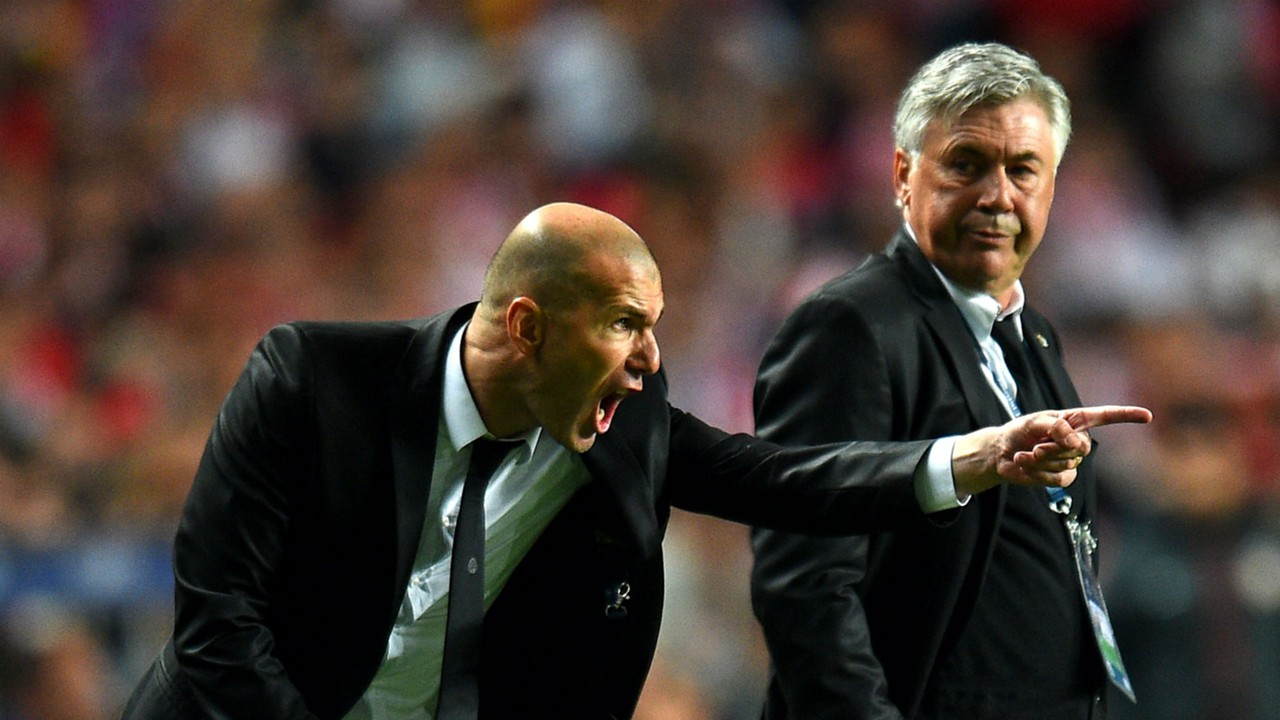

In [5]:
# 온라인 이미지를 바로 볼 수 있는 코드
# cv2.imshow() 명령어는 주피터 세션 충돌을 일으키기 때문에 코랩에서는 사용 불가
# from google.colab.patches import cv2_imshow를 써야함
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

def url_to_image(url):
  resp = urllib.request.urlopen(url)              # 주고 open
  image = np.asarray(bytearray(resp.read()), dtype='uint8')   # 이미지를 배열로 읽기
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)               # cv2에서 이미지로 읽음

  return image

zidane_image = url_to_image('https://ultralytics.com/images/zidane.jpg')  # 함수 실행
print(zidane_image)
cv2_imshow(zidane_image)

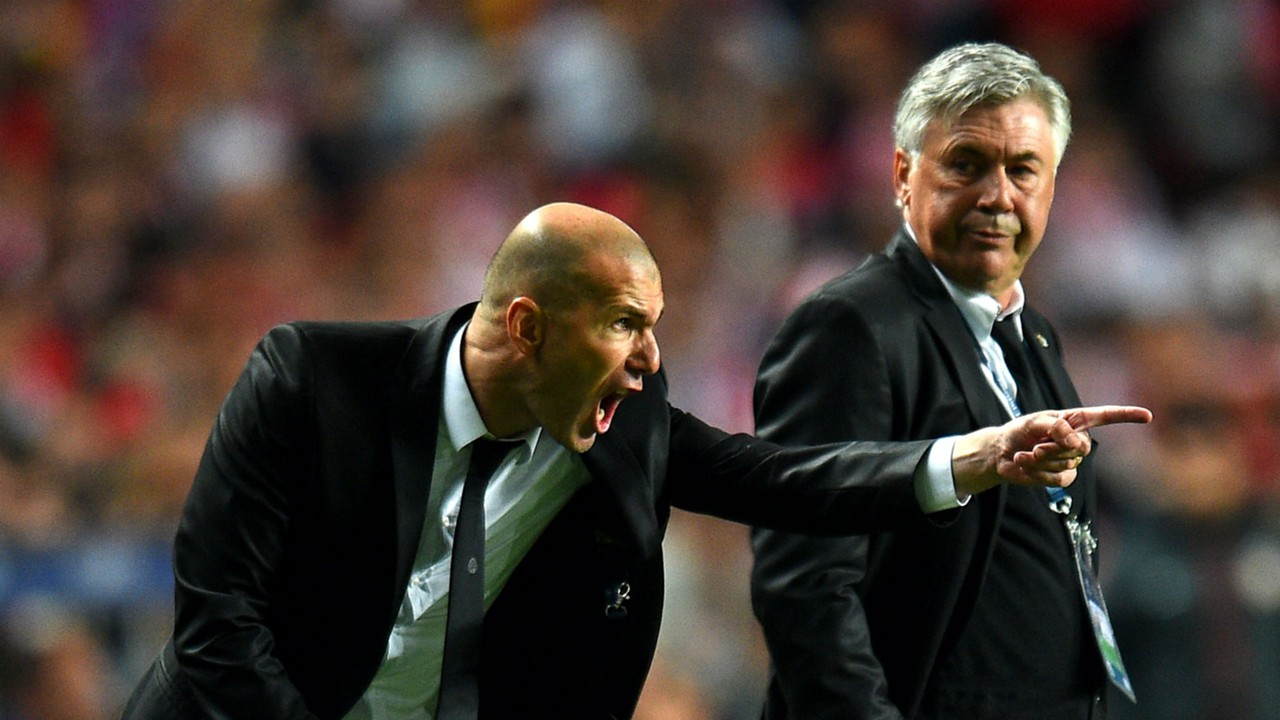

In [7]:
# 만약에 다운로드 한 이미지를 띄우고 싶다면:
image = cv2.imread('zidane.jpg', cv2.IMREAD_COLOR)  
# cv2.imshow('zidane', image) 이 코드는 사용불가
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
print(results)

image 1/1: 720x1280 2 persons, 2 ties
Speed: 427.5ms pre-process, 618.3ms inference, 19.8ms NMS per image at shape (1, 3, 384, 640)



# Detailed Example
###This example shows ***batched inference*** with ***PIL*** and ***OpenCV*** image sources. **results** can be ***printed*** to console, ***saved*** to runs/hub, ***showed*** to screen on supported environments, and returned as ***tensors*** or ***pandas*** dataframes

###### inference란:
예)학습을 마친 개체명 인식 모델을 인퍼런스(inference)하는 과정을 실습합니다. 인퍼런스란 학습을 마친 모델로 실제 과제를 수행하는 행위 혹은 그 과정을 가리킵니다. 다시 말해 모델을 개체명 인식이라는 실전에 투입하는 것입니다.

In [41]:
import cv2
import torch
from PIL import Image
import numpy as np

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# images
for f in ['zidane.jpg','bus.jpg']:
  torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f) # download 2 images
  # print(f)
  img1 = Image.open('zidane.jpg') # PIL Image
  img2 = cv2.imread('bus.jpg')[:, :, ::-1]   # OpenCV image(BGR 2 RGB)
  imgs = [img1, img2]    # batch of images
# print(imgs)
# print(len(imgs))
# inference
results = model(imgs, size = 640)   # includes NMS

# results
results.print()
results.save()

print(results.xyxy[0])   # img1 predictions(tensor)
print(results.pandas().xyxy[0])  # img1 predictionss(pandas)
print(results.xyxy[1])   # img1 predictions(tensor)
print(results.pandas().xyxy[1])  # img1 predictionss(pandas)

#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

Saved 2 images to runs/detect/exp4


image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 20.3ms pre-process, 405.4ms inference, 1.3ms NMS per image at shape (2, 3, 640, 640)
tensor([[7.42550e+02, 4.80370e+01, 1.14120e+03, 7.16642e+02, 8.81825e-01, 0.00000e+00],
        [4.42060e+02, 4.37528e+02, 4.96809e+02, 7.09839e+02, 6.87342e-01, 2.70000e+01],
        [1.25191e+02, 1.93681e+02, 7.11992e+02, 7.13047e+02, 6.39419e-01, 0.00000e+00],
        [9.82893e+02, 3.08357e+02, 1.02737e+03, 4.20092e+02, 2.62013e-01, 2.70000e+01]])
         xmin        ymin         xmax        ymax  confidence  class    name
0  742.550232   48.037018  1141.204712  716.641846    0.881825      0  person
1  442.059509  437.528076   496.809326  709.839111    0.687342     27     tie
2  125.191376  193.680695   711.992432  713.046997    0.639419      0  person
3  982.893066  308.356689  1027.368774  420.091797    0.262013     27     tie
tensor([[2.20868e+02, 4.07422e+02, 3.45724e+02, 8.74688e+02, 8.35148e-01, 0.00000e+00],
  

In [36]:
# https://appia.tistory.com/365
from PIL import Image
image1 = Image.open('/content/runs/detect/exp/image1.jpg')
image1.show()
image1_size = image1.size
print(image1.size)

(810, 1080)


In [38]:
results.show()

###### For all inference options see YOLOv5 ***autoshape()*** forward method:
https://github.com/ultralytics/yolov5/blob/3551b072b366989b82b3777c63ea485a99e0bf90/models/common.py#L182-L191

# Inference Settings
Inference settings such as ***confidence*** threshold NMA ***IoU threshold***, and ***classes*** filter are model attributes, and can be modified by:



In [42]:
model.conf = 0.25 # confidence threshold
model.iou = 0.45 # NMS IoU threshold
model.classes = None

results = model(imgs, size = 320)  # custom inference size
results.print()
results.show()
print(results.xyxy[0])
print(results.pandas().xyxy[0])

image 1/2: 720x1280 2 persons, 1 tie
image 2/2: 1080x810 3 persons, 1 bus
Speed: 9.5ms pre-process, 109.5ms inference, 0.8ms NMS per image at shape (2, 3, 320, 320)
tensor([[1.33054e+02, 2.00707e+02, 1.05316e+03, 7.14755e+02, 8.69394e-01, 0.00000e+00],
        [7.43606e+02, 3.63319e+01, 1.16876e+03, 7.13833e+02, 8.49919e-01, 0.00000e+00],
        [3.94785e+02, 4.41820e+02, 5.01199e+02, 7.07678e+02, 3.02186e-01, 2.70000e+01]])
         xmin        ymin         xmax        ymax  confidence  class    name
0  133.053741  200.706848  1053.163696  714.755432    0.869394      0  person
1  743.606323   36.331940  1168.764893  713.833130    0.849919      0  person
2  394.785126  441.820312   501.198944  707.678467    0.302186     27     tie


# Input Channels
To load a pretrained YOLOv5s model with 4 input channels rather than the default 3:

In [43]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', channels=4)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CPU


                 from  n    params  module                                  arguments                     
  0                -1  1      4672  models.common.Conv                      [4, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7              

#### In this case the model will be composed of pretrained weights **except for** the very first input  layer, which is no longer the same shape as the pretrained input layer. The input lyarer will remain initialized by random weights

# Numberof Classes
To load a pretrained YOLOv5s model with 10 output classes rather thann the default 80<br>
In this case the model will be composed of pretrained weights except for the output layers, whicd are no longer the same shape as the pretrained output layers. The output layeres will remain initialized by random weights

In [46]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', classes=10)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CPU

Overriding model.yaml nc=80 with nc=10

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256

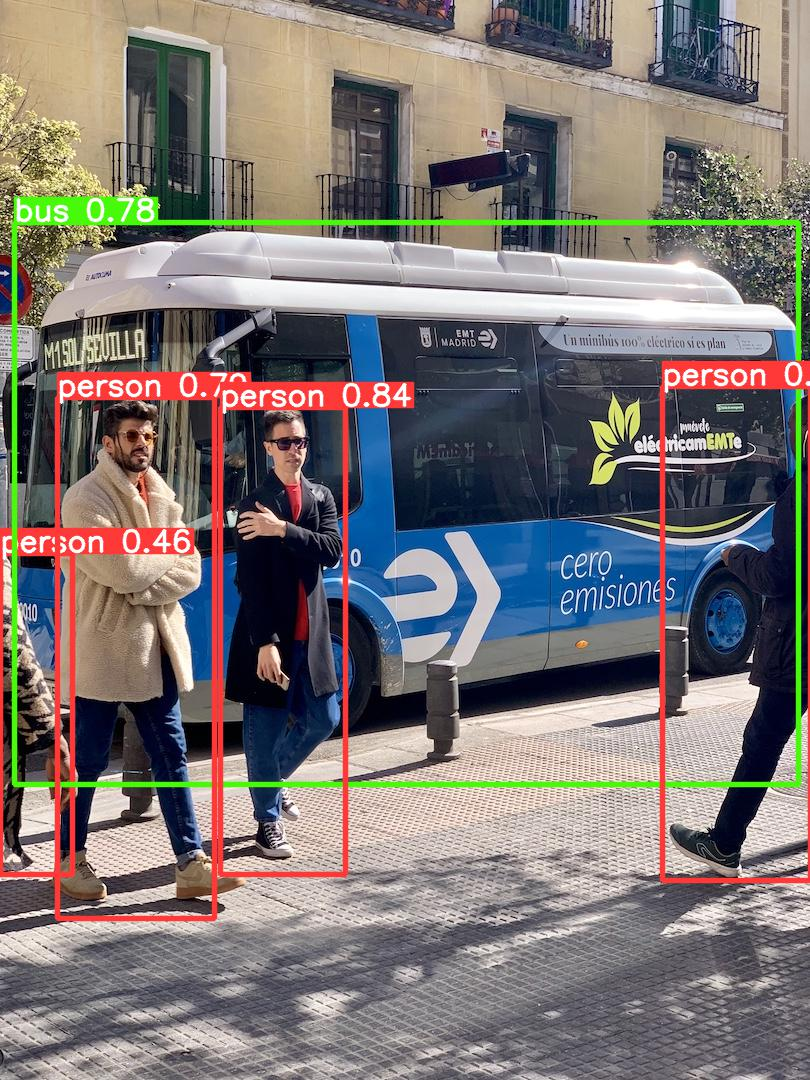

In [47]:
image = cv2.imread('/content/runs/detect/exp/image1.jpg', cv2.IMREAD_COLOR)  
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

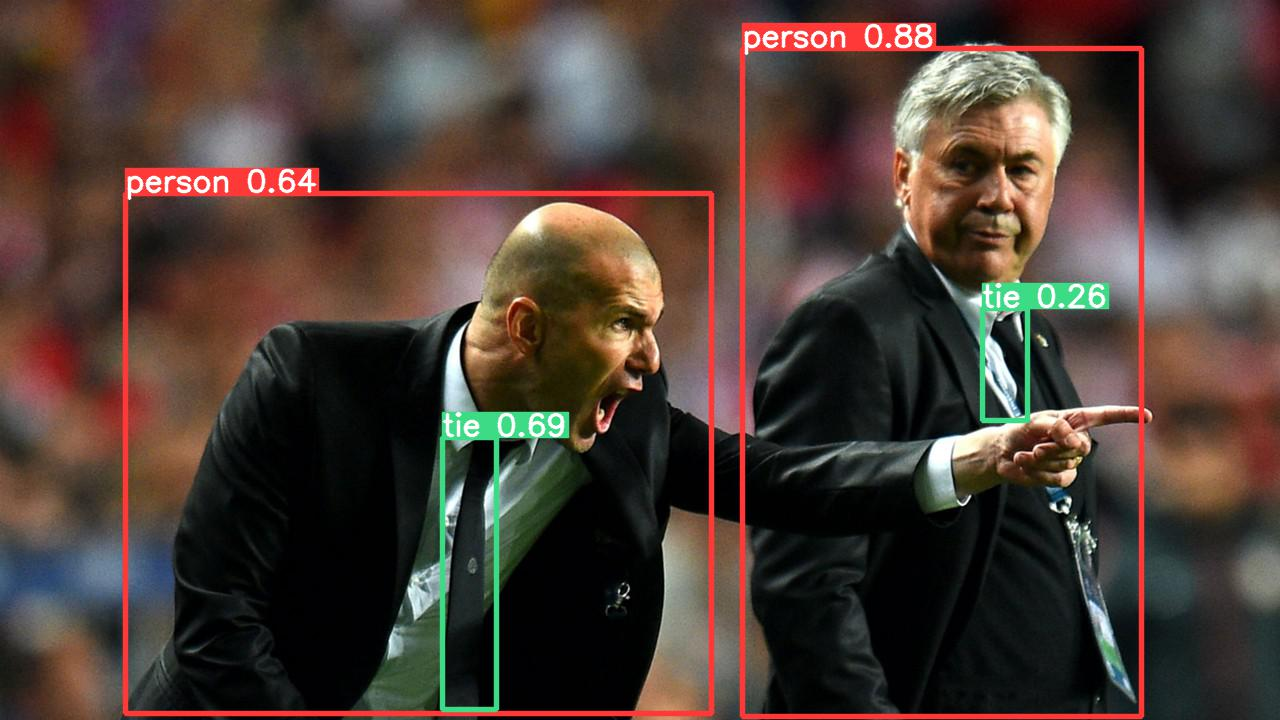

In [48]:
image = cv2.imread('/content/runs/detect/exp/zidane.jpg', cv2.IMREAD_COLOR)  
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()